In [1]:
import pandas as pd
df=pd.read_csv("fake_or_real_news.csv")
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [2]:
df.shape

(6335, 4)

In [3]:
df.label.value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

In [5]:
df['label_num']=df['label'].map({'FAKE':0,'REAL':1})
df.head()

,Unnamed: 0,title,text,label,label_num
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1


In [6]:
import spacy
nlp=spacy.load("en_core_web_lg")

In [7]:
doc=nlp("Watch The Exact Moment Paul Ryan Committed Pol")
doc.vector

array([-2.4471245e+00,  3.1581998e-01,  1.3717098e+00,  6.9761008e-01,
        2.7994387e+00, -5.3771001e-01,  9.2382997e-01,  2.2857127e-01,
       -5.1013750e-01, -2.2603025e+00,  3.9160743e-01, -1.6351752e-01,
       -1.3064581e+00, -1.8633808e+00, -6.5884995e-01,  6.6381502e-01,
        3.2876575e+00,  2.2078989e+00,  7.4296635e-01,  1.2608137e+00,
       -4.1015065e-01,  8.5915124e-01, -5.8287561e-02,  9.5676255e-01,
        1.0159339e+00,  2.3470876e-01, -1.2191125e+00,  6.9068635e-01,
        1.4940876e+00,  2.3278335e-01, -2.2020243e-01,  1.5543288e+00,
        5.2060670e-01,  1.0168149e+00, -4.0908041e+00, -2.3396482e+00,
       -1.3663551e+00, -5.3118497e-01, -6.5199751e-01, -1.8698113e+00,
       -3.7116748e-01, -6.9468129e-01, -1.6191212e+00,  2.3465798e+00,
       -2.4173868e-01,  2.4122974e-01,  3.9542878e-01, -6.2924248e-01,
       -1.2720438e+00, -1.1452636e+00,  6.2392879e-01,  4.8490357e-01,
       -1.1679661e+00, -1.0799600e+00, -1.5725149e-01, -1.3797116e-01,
      

In [8]:
doc.vector.shape

(300,)

In [10]:
df['vector']=df['text'].apply(lambda x:nlp(x).vector)

In [11]:
df.head()

,Unnamed: 0,title,text,label,label_num,vector
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0,"[-1.3751823, 1.3421849, -2.3666484, 0.12908486..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0,"[-1.7449774, 0.93961924, -2.024867, 0.42536643..."
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1,"[-1.9426425, 1.0062195, -1.9992222, 0.20469022..."
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0,"[-1.9125352, -0.1481846, -1.1432766, 0.6861217..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1,"[-1.8516092, 1.3163909, -2.1726575, 1.2286776,..."


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
df.vector.values,
df.label_num,
test_size=0.2,random_state=2022
)

In [17]:
X_train

array([array([-1.4768193e+00,  1.2732317e+00, -1.7895089e+00, -3.4820203e-02,
               3.9091187e+00,  6.0799259e-01,  5.2044690e-01,  3.9834721e+00,
              -6.1455947e-01, -1.5022930e+00,  5.3331876e+00,  1.2243152e+00,
              -2.5618393e+00,  5.3156483e-01,  5.6343216e-01,  1.8454490e+00,
               7.8995931e-01, -2.9659832e-01, -9.2745507e-01, -7.5172907e-01,
               1.1557000e+00, -8.9287418e-01, -2.5076750e-01, -7.8641444e-01,
              -3.3672819e-01, -1.2114938e+00, -1.9897865e+00, -4.9044690e-01,
              -2.4810390e-01,  1.0878336e+00,  6.8050766e-01, -2.8614947e-01,
              -5.1049900e-01, -1.3201569e+00, -2.6460927e+00, -8.5276824e-01,
              -6.1353689e-01,  7.1295565e-01,  8.8003683e-01,  4.4213006e-01,
               3.0639205e-02, -1.8999333e-02,  1.7505139e-01, -4.8572566e-02,
              -1.4308001e+00,  1.0495782e+00,  2.4634039e-01, -2.4439020e+00,
              -9.5968407e-01,  1.7876474e+00, -1.3253031e+00,  1

In [18]:
X_train.shape

(5068,)

In [19]:
X_test.shape

(1267,)

In [20]:
import numpy as np
X_train_2d=np.stack(X_train)
X_test_2d=np.stack(X_test)

In [21]:
X_train_2d

array([[-1.4768193 ,  1.2732317 , -1.7895089 , ...,  0.00571825,
        -2.4560578 ,  0.40920025],
       [-1.880838  ,  0.9287342 , -2.029089  , ..., -0.96740454,
        -2.6048605 ,  1.2269905 ],
       [-1.3122019 ,  1.0906973 , -1.872735  , ..., -0.24167097,
        -2.7784927 ,  0.76039165],
       ...,
       [-0.8026014 ,  1.3858608 , -1.9710494 , ...,  0.19331345,
        -2.586176  ,  0.7919582 ],
       [-1.3007778 ,  0.93595135, -1.8760581 , ..., -0.5617441 ,
        -2.661596  ,  0.49654076],
       [-1.3932155 ,  1.1112378 , -2.1222537 , ..., -0.39062804,
        -2.569749  ,  0.7711082 ]], dtype=float32)

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler#used to draw_negative_values_into_positive_values
Scaler=MinMaxScaler()
scale_train_embed=Scaler.fit_transform(X_train_2d)
scale_test_embed=Scaler.transform(X_test_2d)
clf=MultinomialNB()
clf.fit(scale_train_embed,y_train)

MultinomialNB()

In [25]:
from sklearn.metrics import classification_report
y_pred=clf.predict(scale_test_embed)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.69      0.76       634
           1       0.73      0.87      0.80       633

    accuracy                           0.78      1267
   macro avg       0.79      0.78      0.78      1267
weighted avg       0.79      0.78      0.78      1267



In [26]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=5,metric='euclidean')
clf.fit(X_train_2d,y_train)
y_pred=clf.predict(X_test_2d)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.90      0.76      0.83       634
           1       0.80      0.92      0.85       633

    accuracy                           0.84      1267
   macro avg       0.85      0.84      0.84      1267
weighted avg       0.85      0.84      0.84      1267



In [59]:
#Exercise
df=pd.read_json('News_Category_Dataset_v3.json',lines=True)

In [60]:
print(df.shape)

(209527, 6)


In [61]:
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [62]:
df['category'].value_counts()

category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATI

In [63]:
df['label_num']=df['category'].map({'CRIME':0,'SPORTS':1,'BUISNESS':2})
df.head()

,link,headline,category,short_description,authors,date,label_num
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,NaN
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,NaN
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,NaN
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,NaN
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,NaN


In [64]:
def preprocess(short_description):
    doc=nlp(short_description)
    filtered_tokens=[]
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return ' '.join(filtered_tokens)
    

In [65]:
df['preprocessed_text']=df['short_description'].apply(lambda short_description: preprocess(short_description))

In [66]:
df.head()

,link,headline,category,short_description,authors,date,label_num,preprocessed_text
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,NaN,health expert say early predict demand match 1...
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,NaN,subdue passenger crew flee aircraft confrontat...
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,NaN,dog understand eat
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,NaN,accidentally grow toothpaste toddler toothbrus...
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,NaN,Amy Cooper accuse investment firm Franklin Tem...


In [67]:
df=df.dropna()

In [68]:
df

,link,headline,category,short_description,authors,date,label_num,preprocessed_text
17,https://www.huffpost.com/entry/dodgers-basebal...,"Maury Wills, Base-Stealing Shortstop For Dodge...",SPORTS,"Maury Wills, who helped the Los Angeles Dodger...","Beth Harris, AP",2022-09-20,1.0,Maury Wills help Los Angeles Dodgers win World...
26,https://www.huffpost.com/entry/2022-wnba-final...,"Las Vegas Aces Win First WNBA Title, Chelsea G...",SPORTS,Las Vegas never had a professional sports cham...,"Pat Eaton-Robb, AP",2022-09-19,1.0,Las Vegas professional sport champion Sunday
61,https://www.huffpost.com/entry/boston-marathon...,Boston Marathon To Make Race More Inclusive Fo...,SPORTS,The race's organizers say nonbinary athletes w...,Sanjana Karanth,2022-09-12,1.0,race organizer nonbinary athlete will register...
62,https://www.huffpost.com/entry/anthony-varvaro...,"Anthony Varvaro, MLB Pitcher Turned Transit Co...",SPORTS,Varvaro pitched mostly with the Atlanta Braves...,,2022-09-12,1.0,Varvaro pitch Atlanta Braves start law enforce...
67,https://www.huffpost.com/entry/carlos-alcaraz-...,Carlos Alcaraz Wins U.S. Open For 1st Slam Tit...,SPORTS,Carlos Alcaraz defeated Casper Ruud in the U.S...,"HOWARD FENDRICH, AP",2022-09-11,1.0,Carlos Alcaraz defeat Casper Ruud U.S. Open fi...
...,...,...,...,...,...,...,...,...
209460,https://www.huffingtonpost.com/entry/time-warn...,Thank You James Dolan and Time Warner,SPORTS,"Given the Knicks 7-13 record, James Dolan and ...","Kelli Gail, Contributor\nFreelance writer",2012-01-29,1.0,give Knicks 7 13 record James Dolan company ac...
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28,1.0,afterward Azarenka effusive press normal credi...
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28,1.0,lead Super Bowl XLVI talk game end occur year ago
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28,1.0,correction early version story incorrectly sta...


In [69]:
df['vector']=df['preprocessed_text'].apply(lambda short_description: nlp(short_description).vector)

In [70]:
df.head()

,link,headline,category,short_description,authors,date,label_num,preprocessed_text,vector
17,https://www.huffpost.com/entry/dodgers-basebal...,"Maury Wills, Base-Stealing Shortstop For Dodge...",SPORTS,"Maury Wills, who helped the Los Angeles Dodger...","Beth Harris, AP",2022-09-20,1.0,Maury Wills help Los Angeles Dodgers win World...,"[-1.3688151, 0.47853285, 0.17928503, 0.9036184..."
26,https://www.huffpost.com/entry/2022-wnba-final...,"Las Vegas Aces Win First WNBA Title, Chelsea G...",SPORTS,Las Vegas never had a professional sports cham...,"Pat Eaton-Robb, AP",2022-09-19,1.0,Las Vegas professional sport champion Sunday,"[1.3255935, -0.6754551, -1.1674968, 1.5271367,..."
61,https://www.huffpost.com/entry/boston-marathon...,Boston Marathon To Make Race More Inclusive Fo...,SPORTS,The race's organizers say nonbinary athletes w...,Sanjana Karanth,2022-09-12,1.0,race organizer nonbinary athlete will register...,"[-0.024312122, 0.78713703, -0.5677765, 0.42693..."
62,https://www.huffpost.com/entry/anthony-varvaro...,"Anthony Varvaro, MLB Pitcher Turned Transit Co...",SPORTS,Varvaro pitched mostly with the Atlanta Braves...,,2022-09-12,1.0,Varvaro pitch Atlanta Braves start law enforce...,"[-1.1669456, 1.0106845, -0.3712678, 1.4565744,..."
67,https://www.huffpost.com/entry/carlos-alcaraz-...,Carlos Alcaraz Wins U.S. Open For 1st Slam Tit...,SPORTS,Carlos Alcaraz defeated Casper Ruud in the U.S...,"HOWARD FENDRICH, AP",2022-09-11,1.0,Carlos Alcaraz defeat Casper Ruud U.S. Open fi...,"[-0.8635624, -1.6832448, 1.8216084, 0.8152404,..."


In [71]:
df.dropna()

,link,headline,category,short_description,authors,date,label_num,preprocessed_text,vector
17,https://www.huffpost.com/entry/dodgers-basebal...,"Maury Wills, Base-Stealing Shortstop For Dodge...",SPORTS,"Maury Wills, who helped the Los Angeles Dodger...","Beth Harris, AP",2022-09-20,1.0,Maury Wills help Los Angeles Dodgers win World...,"[-1.3688151, 0.47853285, 0.17928503, 0.9036184..."
26,https://www.huffpost.com/entry/2022-wnba-final...,"Las Vegas Aces Win First WNBA Title, Chelsea G...",SPORTS,Las Vegas never had a professional sports cham...,"Pat Eaton-Robb, AP",2022-09-19,1.0,Las Vegas professional sport champion Sunday,"[1.3255935, -0.6754551, -1.1674968, 1.5271367,..."
61,https://www.huffpost.com/entry/boston-marathon...,Boston Marathon To Make Race More Inclusive Fo...,SPORTS,The race's organizers say nonbinary athletes w...,Sanjana Karanth,2022-09-12,1.0,race organizer nonbinary athlete will register...,"[-0.024312122, 0.78713703, -0.5677765, 0.42693..."
62,https://www.huffpost.com/entry/anthony-varvaro...,"Anthony Varvaro, MLB Pitcher Turned Transit Co...",SPORTS,Varvaro pitched mostly with the Atlanta Braves...,,2022-09-12,1.0,Varvaro pitch Atlanta Braves start law enforce...,"[-1.1669456, 1.0106845, -0.3712678, 1.4565744,..."
67,https://www.huffpost.com/entry/carlos-alcaraz-...,Carlos Alcaraz Wins U.S. Open For 1st Slam Tit...,SPORTS,Carlos Alcaraz defeated Casper Ruud in the U.S...,"HOWARD FENDRICH, AP",2022-09-11,1.0,Carlos Alcaraz defeat Casper Ruud U.S. Open fi...,"[-0.8635624, -1.6832448, 1.8216084, 0.8152404,..."
...,...,...,...,...,...,...,...,...,...
209460,https://www.huffingtonpost.com/entry/time-warn...,Thank You James Dolan and Time Warner,SPORTS,"Given the Knicks 7-13 record, James Dolan and ...","Kelli Gail, Contributor\nFreelance writer",2012-01-29,1.0,give Knicks 7 13 record James Dolan company ac...,"[-1.4875014, -0.48140255, -0.6969022, 0.690914..."
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28,1.0,afterward Azarenka effusive press normal credi...,"[-0.051570915, 0.9802892, -0.24430908, 0.42612..."
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28,1.0,lead Super Bowl XLVI talk game end occur year ago,"[-1.5553529, 1.054663, -0.71032804, -0.387946,..."
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28,1.0,correction early version story incorrectly sta...,"[-1.3086892, -0.9580834, 0.45889744, 0.1278767..."


In [72]:
df['vector']=df['preprocessed_text'].apply(lambda short_description: nlp(short_description).vector)

In [73]:
#train_test_splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
df.vector.values,
df.label_num,
test_size=0.2,
    random_state=2022,stratify=df.label_num
)

In [75]:
import numpy as np
print("Shape of X_train before reshaping:",X_train.shape)
print("Shape of X_test before reshaping:",X_test.shape)
X_train_2d=np.stack(X_train)
X_test_2d=np.stack(X_test)

print("Shape of X_train after reshaping:",X_train_2d.shape)
print("Shape of X_test after reshaping:",X_test_2d.shape)

Shape of X_train before reshaping: (6911,)
Shape of X_test before reshaping: (1728,)
Shape of X_train after reshaping: (6911, 300)
Shape of X_test after reshaping: (1728, 300)


In [76]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train_2d,y_train)
y_pred=clf.predict(X_test_2d)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.61      0.75      0.67       712
         1.0       0.79      0.66      0.72      1016

    accuracy                           0.70      1728
   macro avg       0.70      0.71      0.70      1728
weighted avg       0.72      0.70      0.70      1728



In [78]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
scaler=MinMaxScaler()
scaled_train_embed=scaler.fit_transform(X_train_2d)
scaled_test_embed=scaler.transform(X_test_2d)
clf=MultinomialNB()
clf.fit(scaled_train_embed,y_train)
y_pred=clf.predict(scaled_test_embed)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.12      0.22       712
         1.0       0.62      0.98      0.76      1016

    accuracy                           0.63      1728
   macro avg       0.72      0.55      0.49      1728
weighted avg       0.70      0.63      0.53      1728



In [79]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=5,metric='euclidean')
clf.fit(X_train_2d,y_train)
y_pred=clf.predict(X_test_2d)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.66      0.71       712
         1.0       0.78      0.86      0.82      1016

    accuracy                           0.77      1728
   macro avg       0.77      0.76      0.76      1728
weighted avg       0.77      0.77      0.77      1728



In [80]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train_2d,y_train)
y_pred=clf.predict(X_test_2d)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.81      0.77       712
         1.0       0.86      0.79      0.82      1016

    accuracy                           0.80      1728
   macro avg       0.79      0.80      0.79      1728
weighted avg       0.80      0.80      0.80      1728



In [81]:
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier()
clf.fit(X_train_2d,y_train)
y_pred=clf.predict(X_test_2d)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.84      0.78       712
         1.0       0.88      0.78      0.82      1016

    accuracy                           0.80      1728
   macro avg       0.80      0.81      0.80      1728
weighted avg       0.81      0.80      0.81      1728



Text(95.72222222222221, 0.5, 'Truth')

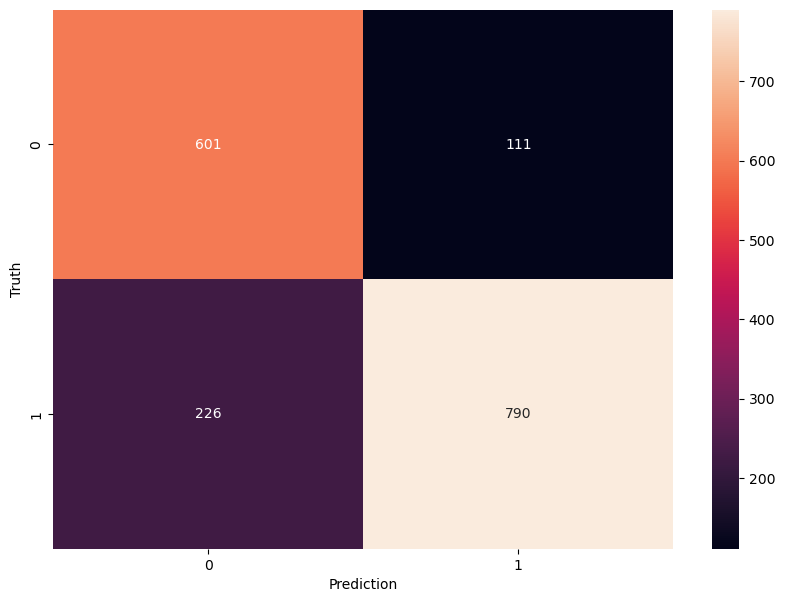

In [83]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')